In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
from imputation import imputed_vals, run, imputed_sqr_err
from utils.forgetter import forget_random_col_per_sample_2
from utils.noise_utils import add_noise_to_column

In [3]:
seed = 42

In [4]:
random_state = np.random.RandomState(seed)
random_generator = np.random.default_rng(seed)

In [5]:
df = pd.read_csv("data/2-test_df.csv", index_col="Unnamed: 0")
df

,T3,FTI,TT4,age,T4U,TSH,psych,thyroid_surgery,goitre,tumor,sex,I131_treatment,on_thyroxine,lithium,sick,pregnant,on_antithyroid_meds
6364,0.3,77.0,68.0,49.0,0.88,68.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7417,1.9,119.0,99.0,73.0,0.83,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
982,1.3,128.0,109.0,62.0,0.85,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2909,2.2,115.0,124.0,72.0,1.08,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5633,2.0,119.0,136.0,63.0,1.14,1.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2.6,111.0,131.0,74.0,1.18,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3083,1.2,24.0,36.0,17.0,1.50,145.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,2.2,108.0,122.0,79.0,1.13,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5443,2.1,116.0,130.0,73.0,1.11,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
qualitative_cols_f = open('data/qualitative_cols.json', 'r')
categorical_cols_f = open('data/categorical_cols.json', 'r')

In [7]:
complete_vals_df = pd.read_csv("data/5-train_df.csv", index_col="Unnamed: 0") 
remove_vals_df = pd.read_csv("data/5-test_df.csv", index_col="Unnamed: 0") 
missing_vals_idxs = list(remove_vals_df.index)

In [8]:
sel_qual_cols = json.load(qualitative_cols_f)
sel_cat_cols = json.load(categorical_cols_f)

In [9]:
weight_map = {
    "age" : 1,
    "T3"  : 1,
    "T4U" : 1,
    "TSH" : 1,
    "TT4" : 1,
    "FTI" : 1
}

In [10]:
complete_vals_df

,T3,FTI,TT4,age,T4U,TSH,psych,thyroid_surgery,goitre,tumor,sex,I131_treatment,on_thyroxine,lithium,sick,pregnant,on_antithyroid_meds
7825,2.3,103.0,90.0,46.0,0.87,1.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2628,4.2,110.0,213.0,34.0,1.94,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2935,2.1,135.0,123.0,71.0,0.91,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.4,6.6,9.7,41.0,1.46,53.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3832,1.5,92.0,101.0,49.0,1.11,2.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1.3,102.0,84.0,68.0,0.82,24.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7212,1.9,127.0,79.0,52.0,0.62,1.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6551,1.3,48.0,43.0,73.0,0.90,2.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2636,2.2,136.0,117.0,68.0,0.86,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
noise_range = range(0, 10, 2)

In [12]:
noisy_df_dict = dict()
noisy_df_dict[0] = complete_vals_df
for i in noise_range:
    if i != 0:
        noisy_vals_df = complete_vals_df.copy()
        for col in sel_qual_cols:
            noisy_vals_df[col] = add_noise_to_column(complete_vals_df, col, i / 10)
        
        noisy_df_dict[i] = noisy_vals_df

In [13]:
noisy_df_dict[0]

,T3,FTI,TT4,age,T4U,TSH,psych,thyroid_surgery,goitre,tumor,sex,I131_treatment,on_thyroxine,lithium,sick,pregnant,on_antithyroid_meds
7825,2.3,103.0,90.0,46.0,0.87,1.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2628,4.2,110.0,213.0,34.0,1.94,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2935,2.1,135.0,123.0,71.0,0.91,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.4,6.6,9.7,41.0,1.46,53.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3832,1.5,92.0,101.0,49.0,1.11,2.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1.3,102.0,84.0,68.0,0.82,24.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7212,1.9,127.0,79.0,52.0,0.62,1.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6551,1.3,48.0,43.0,73.0,0.90,2.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2636,2.2,136.0,117.0,68.0,0.86,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
missing_vals_df = dict()
missing_col_map = dict()
missing_vals_idxs = dict()
picked_cols = dict()

real_df = dict()
curr_df = dict()

for i in noise_range:
    missing_vals_df[i], missing_col_map[i], missing_vals_idxs[i], picked_cols[i] = forget_random_col_per_sample_2(remove_vals_df, weight_map, random_generator)

    real_df[i] = pd.concat([noisy_df_dict[i], remove_vals_df])
    curr_df[i] = pd.concat([noisy_df_dict[i], missing_vals_df[i]])

In [15]:
neighbours = 14

In [16]:
knn_imputed_df = dict()
for i in noise_range:
    knn_imputed_df[i], _ = run(real_df[i], curr_df[i], missing_vals_idxs[i], picked_cols[i], "kNN",
                                config={
                                    "n_neighbors": neighbours
                                }, estimator_config={})

In [17]:
wknn_imputed_df = dict()
for i in noise_range:
    wknn_imputed_df[i], _ = run(real_df[i], curr_df[i], missing_vals_idxs[i], picked_cols[i], "WkNN",
                            config={
                                "n_neighbors": neighbours
                            }, estimator_config={})

In [18]:
iters = 100

In [19]:
mice_imputed_df = dict()
for i in noise_range:
    mice_imputed_df[i], _ = run(real_df[i], curr_df[i], missing_vals_idxs[i], picked_cols[i], "MICE",
                            config={
                                "random_state": random_state, 
                                "max_iter": iters
                            }, estimator_config={})

In [20]:
mice_rf_imputed_df = dict()
for i in noise_range:
    mice_rf_imputed_df[i], _ = run(real_df[i], curr_df[i], missing_vals_idxs[i], picked_cols[i], "MICE RF",
                                config={
                                    "random_state": random_state, 
                                    "max_iter": iters
                                }, estimator_config={
                                    "n_estimators": 300,
                                    "max_depth": 10,
                                    "bootstrap": True,
                                    "max_samples": 0.5,
                                    "random_state": random_state,
                                })

In [21]:
knn_sqr_err_dict = dict()
for i in noise_range:
    knn_sqr_err_dict[i] = imputed_sqr_err(real_df[i].columns, knn_imputed_df[i])

In [22]:
wknn_sqr_err_dict = dict()
for i in noise_range:
    wknn_sqr_err_dict[i] = imputed_sqr_err(real_df[i].columns, wknn_imputed_df[i])

In [23]:
mice_sqr_err_dict = dict()
for i in noise_range:
    mice_sqr_err_dict[i] = imputed_sqr_err(real_df[i].columns, mice_imputed_df[i])

In [24]:
mice_rf_sqr_err_dict = dict()
for i in noise_range:
    mice_rf_sqr_err_dict[i] = imputed_sqr_err(real_df[i].columns, mice_rf_imputed_df[i])

In [25]:
real_cols = [col + " (real)" for col in sel_qual_cols]
imputed_cols = [col + " (imputed)" for col in sel_qual_cols]

In [26]:
def sturges(size : int) -> int:
    return 1 + math.ceil(math.log2(size))

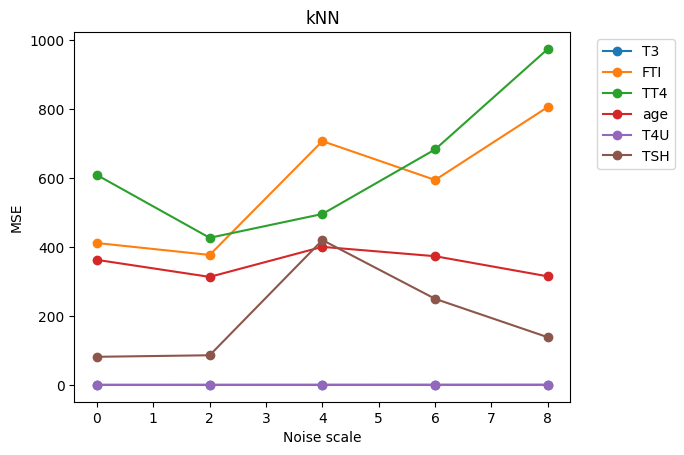

In [27]:
for col in real_df[0].columns:
    if col not in sel_cat_cols:
        X = [k for (k, _) in knn_sqr_err_dict.items()]
        Y = [v[col] for (k, v) in knn_sqr_err_dict.items()]

        plt.plot(X, Y, label=col, marker="o")
        plt.xlabel("Noise scale")
        plt.ylabel("MSE")
        plt.title("kNN")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

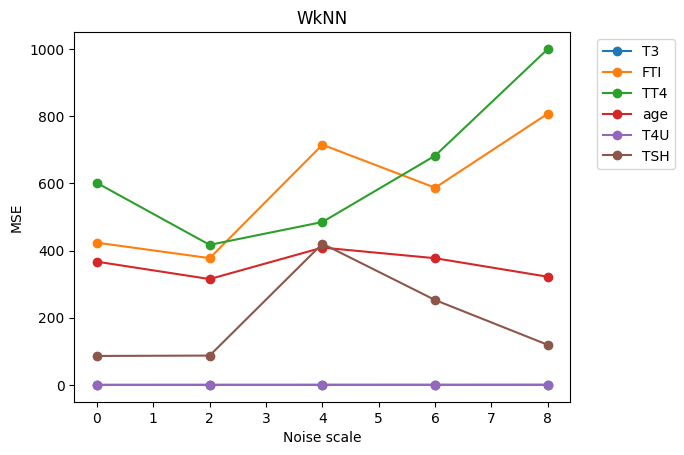

In [28]:
for col in real_df[0].columns:
    if col not in sel_cat_cols:
        X = [k for (k, _) in wknn_sqr_err_dict.items()]
        Y = [v[col] for (k, v) in wknn_sqr_err_dict.items()]

        plt.plot(X, Y, label=col, marker="o")
        plt.xlabel("Noise scale")
        plt.ylabel("MSE")
        plt.title("WkNN")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

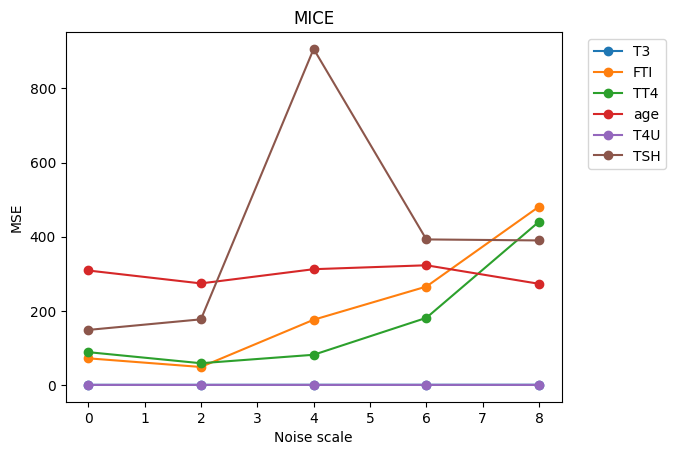

In [29]:
for col in real_df[0].columns:
    if col not in sel_cat_cols:
        X = [k for (k, _) in mice_sqr_err_dict.items()]
        Y = [v[col] for (k, v) in mice_sqr_err_dict.items()]

        plt.plot(X, Y, label=col, marker="o")
        plt.xlabel("Noise scale")
        plt.ylabel("MSE")
        plt.title("MICE")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

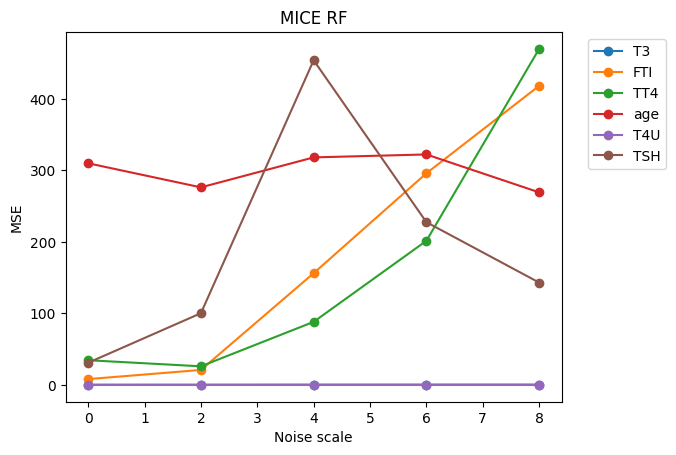

In [30]:
for col in real_df[0].columns:
    if col not in sel_cat_cols:
        X = [k for (k, _) in mice_rf_sqr_err_dict.items()]
        Y = [v[col] for (k, v) in mice_rf_sqr_err_dict.items()]

        plt.plot(X, Y, label=col, marker="o")
        plt.xlabel("Noise scale")
        plt.ylabel("MSE")
        plt.title("MICE RF")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [31]:
methods_map = {
    "kNN": knn_imputed_df,
    "WkNN": wknn_imputed_df,
    "MICE": mice_imputed_df,
    "MICE RF": mice_rf_imputed_df
}

In [32]:
imputed_var_map = dict()
real_var_map = dict()
for method_name, method_df in methods_map.items():
    imputed_var_map[method_name], real_var_map[method_name] = imputed_vals(real_df[0].columns, method_df[0])

In [33]:
cfs_mat_cols = ["T3", "TT4", "TSH"]
expected_dict = dict()
predicted_dict = dict()

In [34]:
def map_t3(val):
    if val < 1.2:
        return "0-1.2"
    elif val >= 1.2 and val <= 3.1:
        return "1.2-3.1"
    return "3.1+" 

In [35]:
def map_tt4(val):
    if val < 58:
        return "0-58"
    elif val >= 58 and val <= 154:
        return "58-154"
    return "154+" 

In [36]:
def map_tsh(val):
    if val < 0.4:
        return "0-0.4"
    elif val >= 0.4 and val <= 5:
        return "0.4-5"
    return "5+" 

In [37]:
mapper = {
    "T3": map_t3,
    "TT4": map_tt4,
    "TSH": map_tsh
}

In [38]:
label_map = {
    "T3": ["0-1.2", "1.2-3.1", "3.1+"],
    "TT4": ["0-58", "58-154", "154+"],
    "TSH": ["0-0.4", "0.4-5", "5+"]
}

In [39]:
for method_name in methods_map.keys():
    predicted_dict[method_name] = dict()
    expected_dict[method_name] = dict()
    for col in cfs_mat_cols:
        predicted_dict[method_name][col] = dict()
        expected_dict[method_name][col] = dict()
        for i in range(len(imputed_var_map[method_name][col])):
            predicted_dict[method_name][col][i] = mapper[col](imputed_var_map[method_name][col][i])
            expected_dict[method_name][col][i] = mapper[col](real_var_map[method_name][col][i])

In [40]:
from confusion_matrix import calculate_relative_confusion_matrix, plot_confusion_matrix

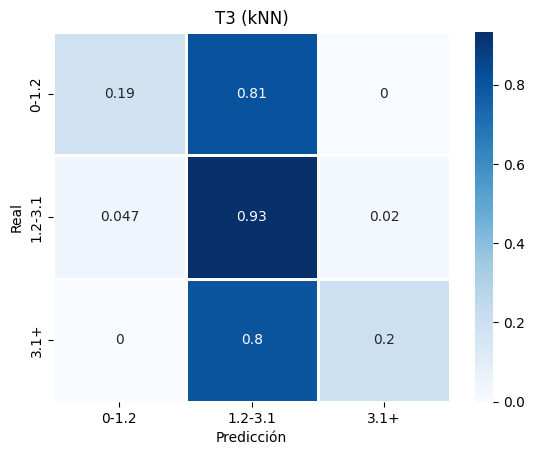

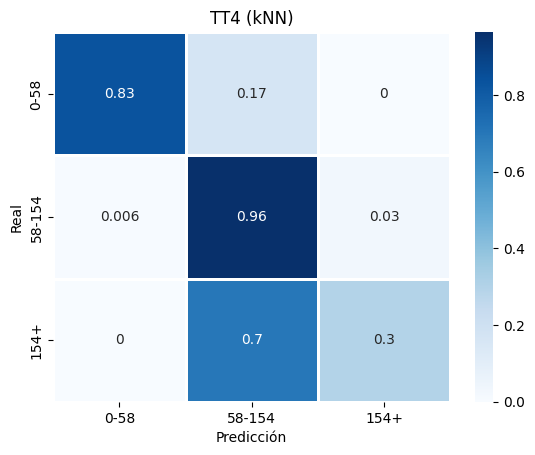

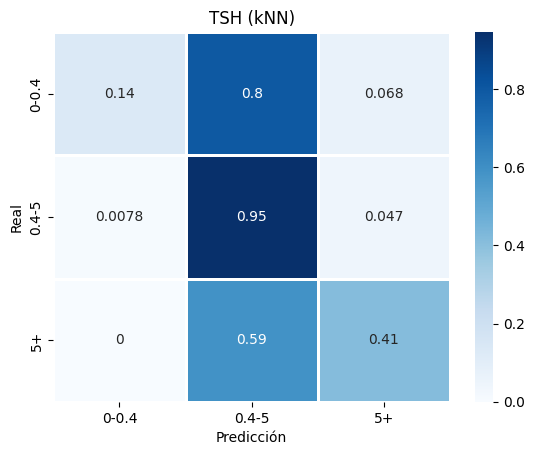

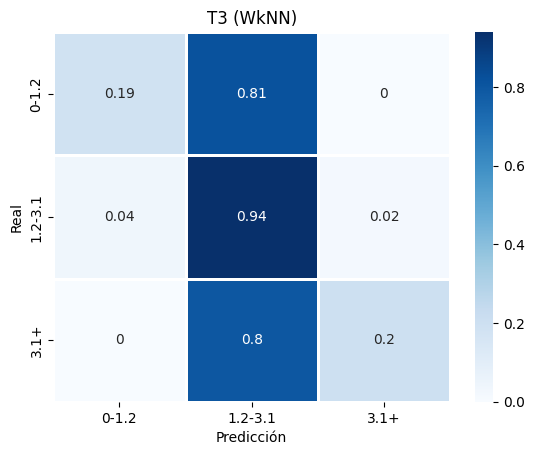

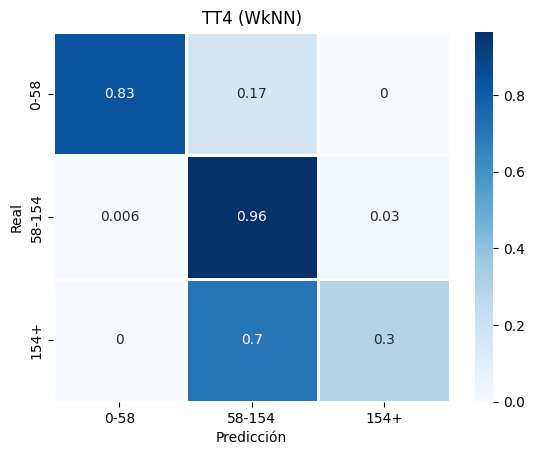

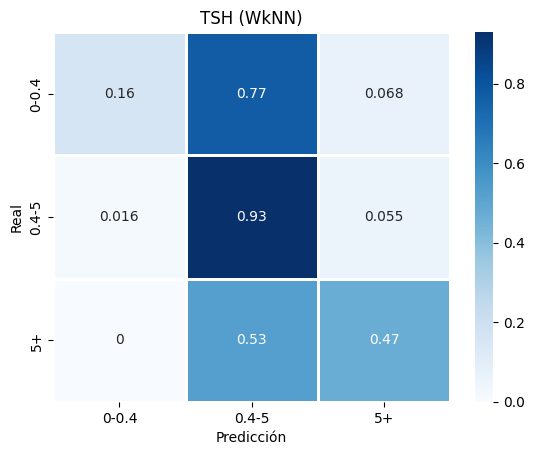

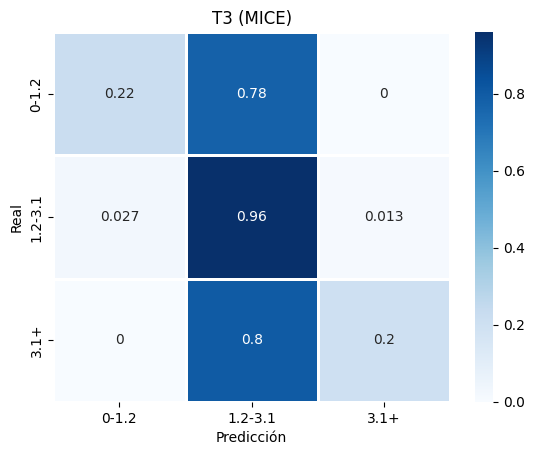

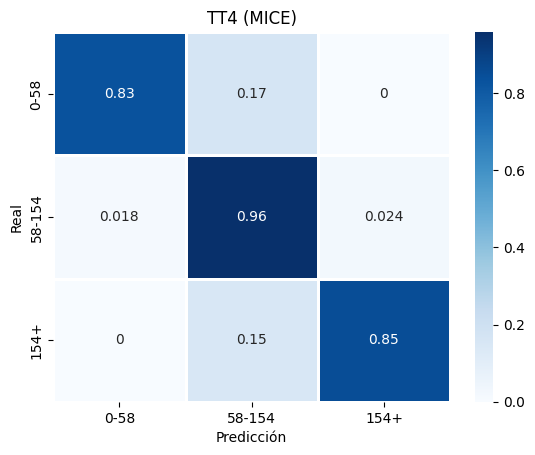

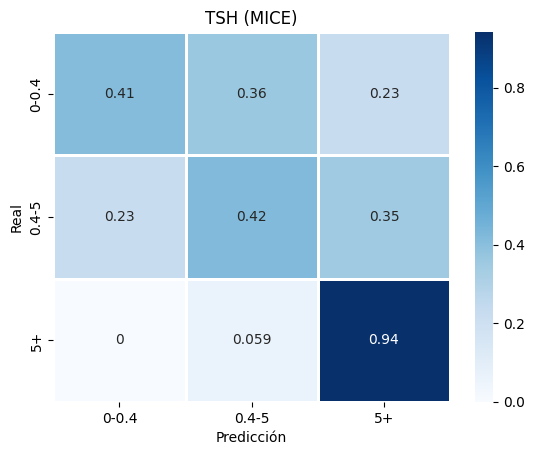

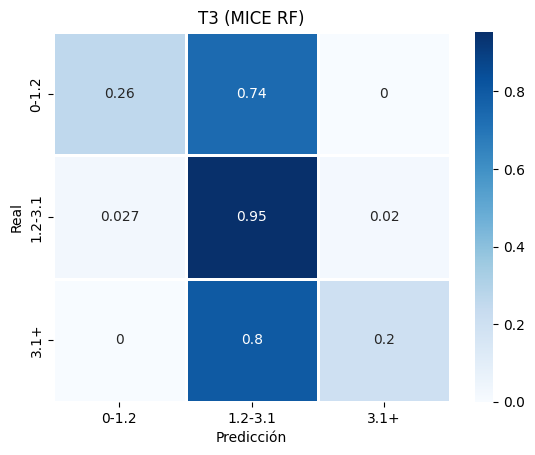

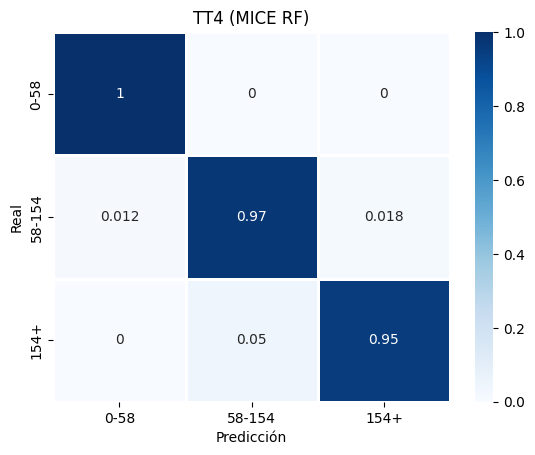

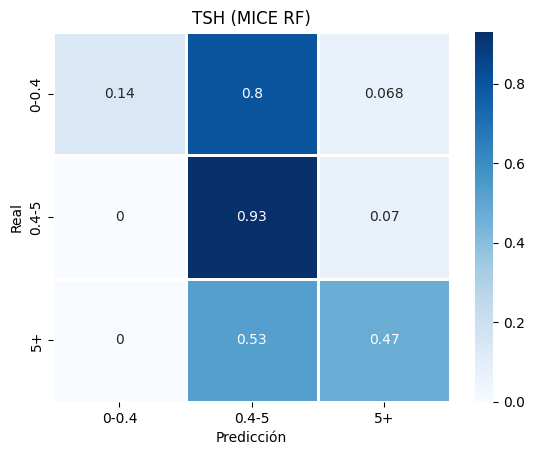

In [41]:
cfs_mats = dict()
for method_name in methods_map.keys():
    cfs_mats[method_name] = dict()
    for col in cfs_mat_cols:
        cfs_mats[method_name][col] = calculate_relative_confusion_matrix(np.array(label_map[col]), predicted_dict[method_name][col], expected_dict[method_name][col])
        plot_confusion_matrix(cfs_mats[method_name][col], col + " ({})".format(method_name), format=".2g")